# Vannila GAN Implementation

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Generator model
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))  # Output layer with 784 units (for MNIST images)
    return model

In [45]:
# Discriminator model
def build_discriminator():
    model = keras.Sequential()
    model.add(layers.Dense(512, input_shape=(784,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with a single unit (real or fake)
    return model

In [46]:
# Define the generator and discriminator
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()

In [47]:
# Define the loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy()

# Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [48]:
# Define the optimizers for generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [49]:
# Training loop
@tf.function
def train_step(images):
    batch_size = tf.shape(images)[0]
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [50]:
# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape(train_images.shape[0], 784)

In [51]:
# Hyperparameters
epochs = 50
batch_size = 128
steps_per_epoch = train_images.shape[0] // batch_size


In [52]:
# Create a dataset and shuffle it
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_images.shape[0]).batch(batch_size)


Epoch 1/50, Step 100/468
Epoch 1/50, Step 200/468
Epoch 1/50, Step 300/468
Epoch 1/50, Step 400/468


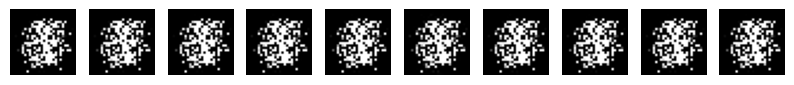

Epoch 2/50, Step 100/468
Epoch 2/50, Step 200/468
Epoch 2/50, Step 300/468
Epoch 2/50, Step 400/468


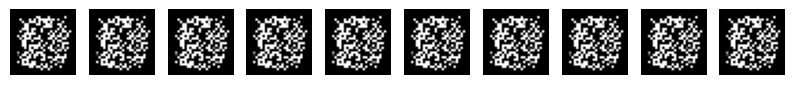

Epoch 3/50, Step 100/468
Epoch 3/50, Step 200/468
Epoch 3/50, Step 300/468
Epoch 3/50, Step 400/468


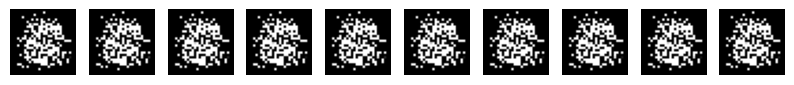

Epoch 4/50, Step 100/468
Epoch 4/50, Step 200/468
Epoch 4/50, Step 300/468
Epoch 4/50, Step 400/468


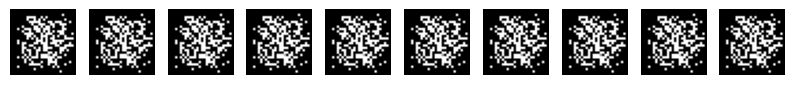

Epoch 5/50, Step 100/468
Epoch 5/50, Step 200/468
Epoch 5/50, Step 300/468
Epoch 5/50, Step 400/468


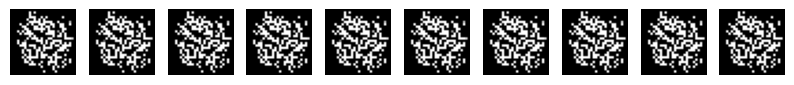

Epoch 6/50, Step 100/468
Epoch 6/50, Step 200/468
Epoch 6/50, Step 300/468
Epoch 6/50, Step 400/468


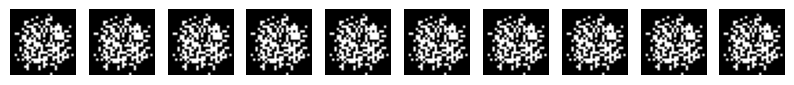

Epoch 7/50, Step 100/468
Epoch 7/50, Step 200/468
Epoch 7/50, Step 300/468
Epoch 7/50, Step 400/468


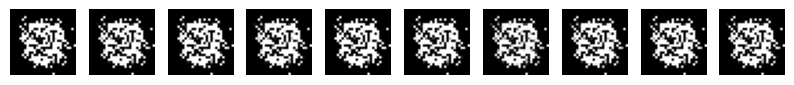

Epoch 8/50, Step 100/468
Epoch 8/50, Step 200/468
Epoch 8/50, Step 300/468
Epoch 8/50, Step 400/468


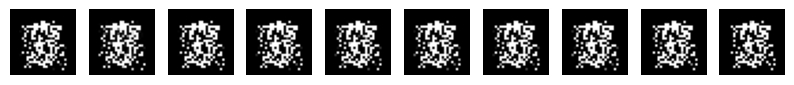

Epoch 9/50, Step 100/468
Epoch 9/50, Step 200/468
Epoch 9/50, Step 300/468
Epoch 9/50, Step 400/468


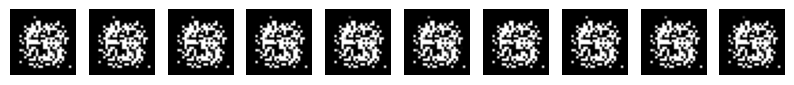

Epoch 10/50, Step 100/468
Epoch 10/50, Step 200/468
Epoch 10/50, Step 300/468
Epoch 10/50, Step 400/468


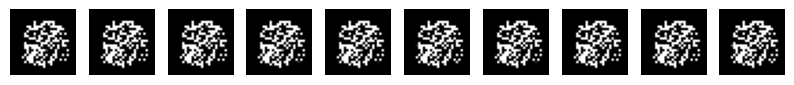

Epoch 11/50, Step 100/468
Epoch 11/50, Step 200/468
Epoch 11/50, Step 300/468
Epoch 11/50, Step 400/468


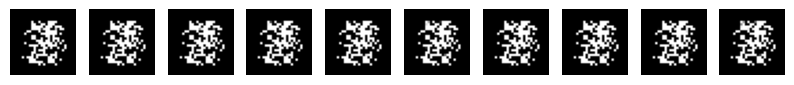

Epoch 12/50, Step 100/468
Epoch 12/50, Step 200/468
Epoch 12/50, Step 300/468
Epoch 12/50, Step 400/468


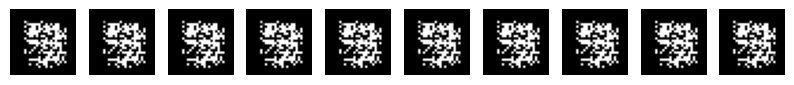

Epoch 13/50, Step 100/468
Epoch 13/50, Step 200/468
Epoch 13/50, Step 300/468
Epoch 13/50, Step 400/468


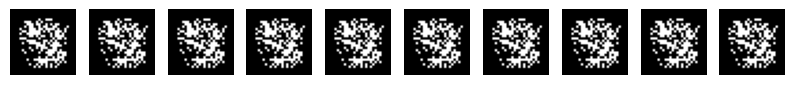

Epoch 14/50, Step 100/468
Epoch 14/50, Step 200/468
Epoch 14/50, Step 300/468
Epoch 14/50, Step 400/468


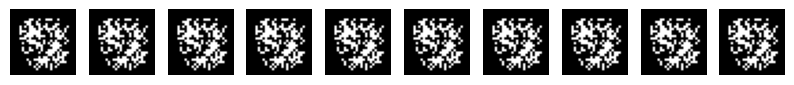

Epoch 15/50, Step 100/468
Epoch 15/50, Step 200/468
Epoch 15/50, Step 300/468
Epoch 15/50, Step 400/468


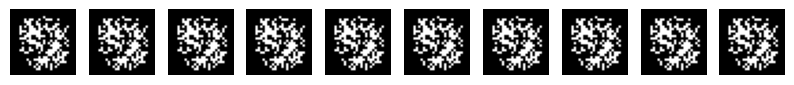

Epoch 16/50, Step 100/468
Epoch 16/50, Step 200/468
Epoch 16/50, Step 300/468
Epoch 16/50, Step 400/468


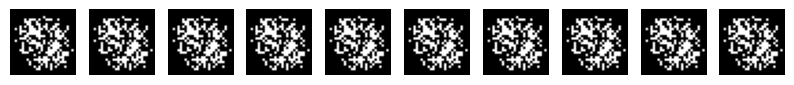

Epoch 17/50, Step 100/468
Epoch 17/50, Step 200/468
Epoch 17/50, Step 300/468
Epoch 17/50, Step 400/468


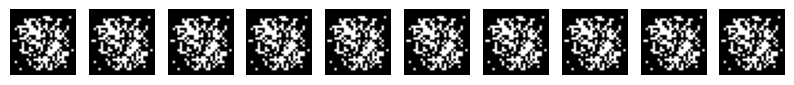

Epoch 18/50, Step 100/468
Epoch 18/50, Step 200/468
Epoch 18/50, Step 300/468
Epoch 18/50, Step 400/468


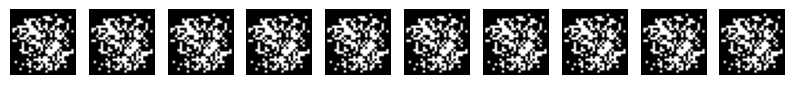

Epoch 19/50, Step 100/468
Epoch 19/50, Step 200/468
Epoch 19/50, Step 300/468
Epoch 19/50, Step 400/468


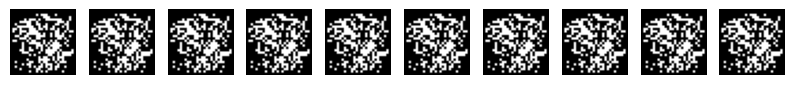

Epoch 20/50, Step 100/468
Epoch 20/50, Step 200/468
Epoch 20/50, Step 300/468
Epoch 20/50, Step 400/468


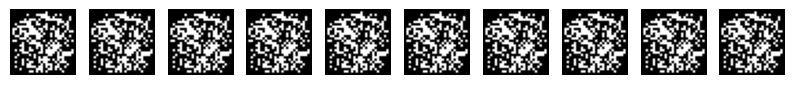

Epoch 21/50, Step 100/468
Epoch 21/50, Step 200/468
Epoch 21/50, Step 300/468
Epoch 21/50, Step 400/468


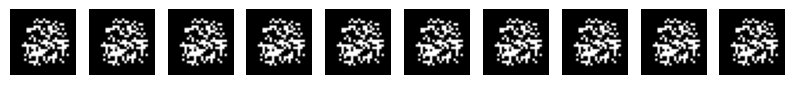

Epoch 22/50, Step 100/468
Epoch 22/50, Step 200/468
Epoch 22/50, Step 300/468
Epoch 22/50, Step 400/468


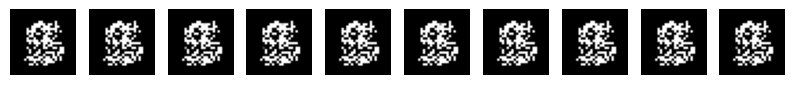

Epoch 23/50, Step 100/468
Epoch 23/50, Step 200/468
Epoch 23/50, Step 300/468
Epoch 23/50, Step 400/468


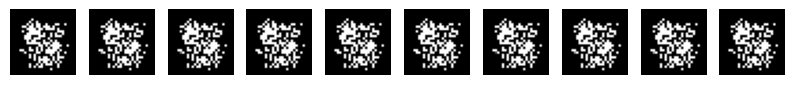

Epoch 24/50, Step 100/468
Epoch 24/50, Step 200/468
Epoch 24/50, Step 300/468
Epoch 24/50, Step 400/468


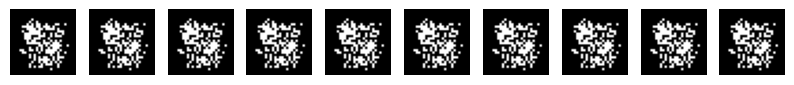

Epoch 25/50, Step 100/468
Epoch 25/50, Step 200/468
Epoch 25/50, Step 300/468
Epoch 25/50, Step 400/468


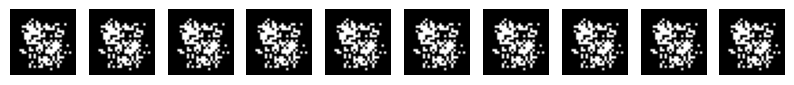

Epoch 26/50, Step 100/468
Epoch 26/50, Step 200/468
Epoch 26/50, Step 300/468
Epoch 26/50, Step 400/468


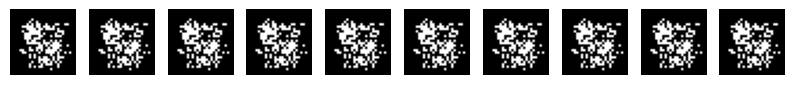

Epoch 27/50, Step 100/468
Epoch 27/50, Step 200/468
Epoch 27/50, Step 300/468
Epoch 27/50, Step 400/468


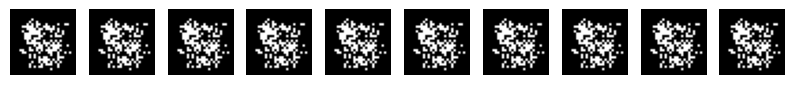

Epoch 28/50, Step 100/468
Epoch 28/50, Step 200/468
Epoch 28/50, Step 300/468
Epoch 28/50, Step 400/468


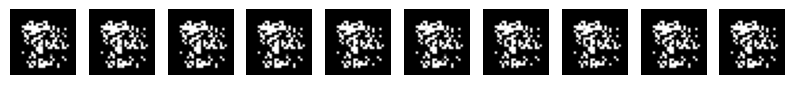

Epoch 29/50, Step 100/468
Epoch 29/50, Step 200/468
Epoch 29/50, Step 300/468
Epoch 29/50, Step 400/468


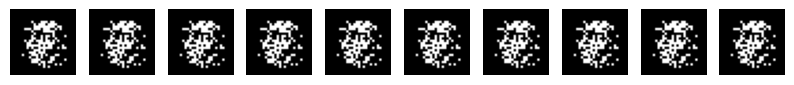

Epoch 30/50, Step 100/468
Epoch 30/50, Step 200/468
Epoch 30/50, Step 300/468
Epoch 30/50, Step 400/468


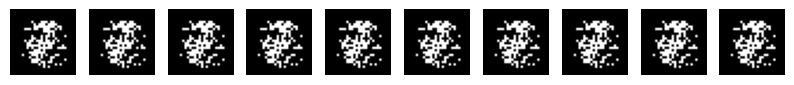

Epoch 31/50, Step 100/468
Epoch 31/50, Step 200/468
Epoch 31/50, Step 300/468
Epoch 31/50, Step 400/468


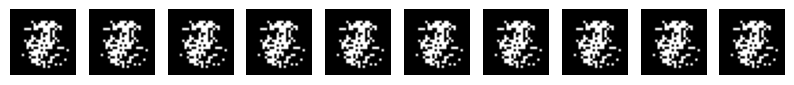

Epoch 32/50, Step 100/468
Epoch 32/50, Step 200/468
Epoch 32/50, Step 300/468
Epoch 32/50, Step 400/468


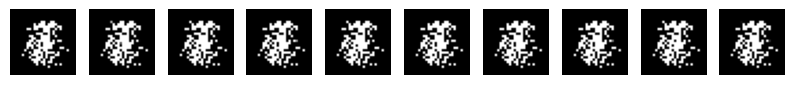

Epoch 33/50, Step 100/468
Epoch 33/50, Step 200/468
Epoch 33/50, Step 300/468
Epoch 33/50, Step 400/468


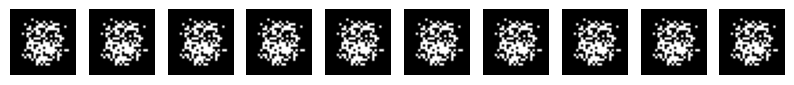

Epoch 34/50, Step 100/468
Epoch 34/50, Step 200/468
Epoch 34/50, Step 300/468
Epoch 34/50, Step 400/468


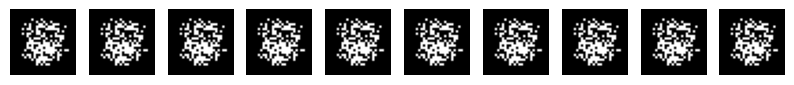

Epoch 35/50, Step 100/468
Epoch 35/50, Step 200/468
Epoch 35/50, Step 300/468
Epoch 35/50, Step 400/468


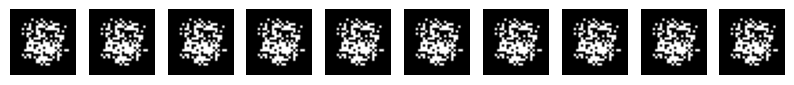

Epoch 36/50, Step 100/468
Epoch 36/50, Step 200/468
Epoch 36/50, Step 300/468
Epoch 36/50, Step 400/468


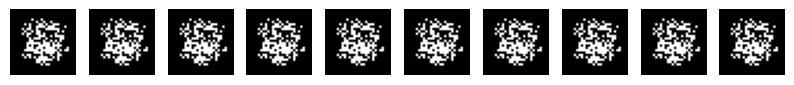

Epoch 37/50, Step 100/468
Epoch 37/50, Step 200/468
Epoch 37/50, Step 300/468
Epoch 37/50, Step 400/468


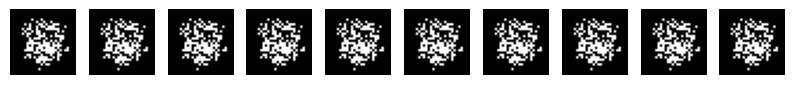

Epoch 38/50, Step 100/468
Epoch 38/50, Step 200/468
Epoch 38/50, Step 300/468
Epoch 38/50, Step 400/468


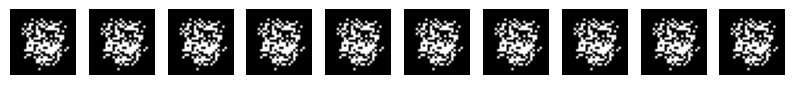

Epoch 39/50, Step 100/468
Epoch 39/50, Step 200/468
Epoch 39/50, Step 300/468
Epoch 39/50, Step 400/468


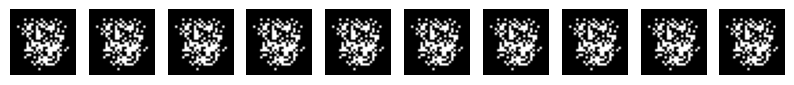

Epoch 40/50, Step 100/468
Epoch 40/50, Step 200/468
Epoch 40/50, Step 300/468
Epoch 40/50, Step 400/468


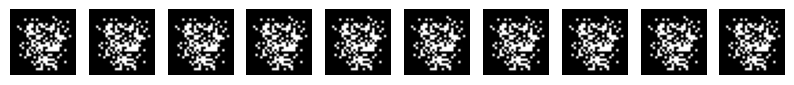

Epoch 41/50, Step 100/468
Epoch 41/50, Step 200/468
Epoch 41/50, Step 300/468
Epoch 41/50, Step 400/468


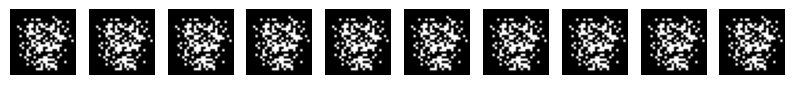

Epoch 42/50, Step 100/468
Epoch 42/50, Step 200/468
Epoch 42/50, Step 300/468
Epoch 42/50, Step 400/468


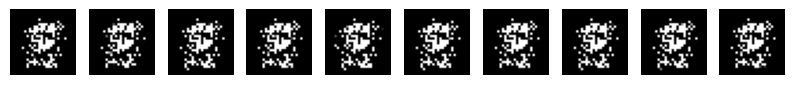

Epoch 43/50, Step 100/468
Epoch 43/50, Step 200/468
Epoch 43/50, Step 300/468
Epoch 43/50, Step 400/468


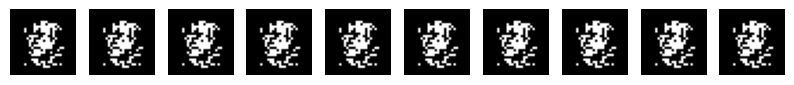

Epoch 44/50, Step 100/468
Epoch 44/50, Step 200/468
Epoch 44/50, Step 300/468
Epoch 44/50, Step 400/468


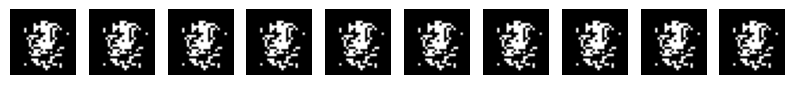

Epoch 45/50, Step 100/468
Epoch 45/50, Step 200/468
Epoch 45/50, Step 300/468
Epoch 45/50, Step 400/468


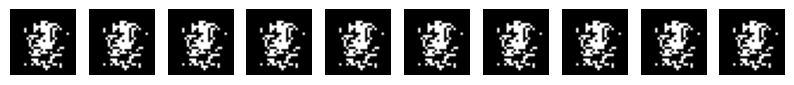

Epoch 46/50, Step 100/468
Epoch 46/50, Step 200/468
Epoch 46/50, Step 300/468
Epoch 46/50, Step 400/468


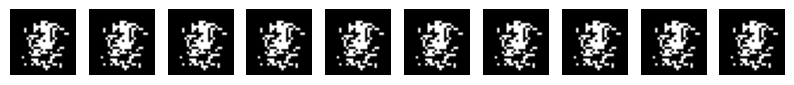

Epoch 47/50, Step 100/468
Epoch 47/50, Step 200/468
Epoch 47/50, Step 300/468
Epoch 47/50, Step 400/468


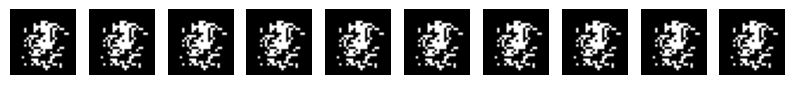

Epoch 48/50, Step 100/468
Epoch 48/50, Step 200/468
Epoch 48/50, Step 300/468
Epoch 48/50, Step 400/468


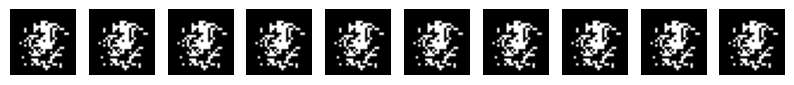

Epoch 49/50, Step 100/468
Epoch 49/50, Step 200/468
Epoch 49/50, Step 300/468
Epoch 49/50, Step 400/468


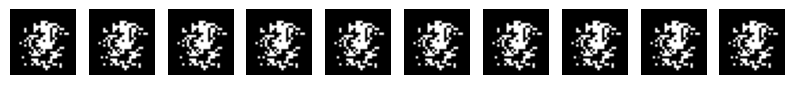

Epoch 50/50, Step 100/468
Epoch 50/50, Step 200/468
Epoch 50/50, Step 300/468
Epoch 50/50, Step 400/468


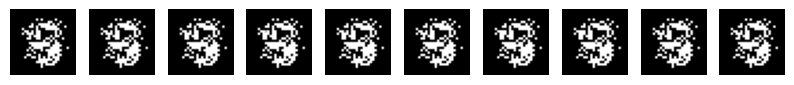

In [53]:
# Training loop
for epoch in range(epochs):
    for step, images in enumerate(dataset):
        train_step(images)

        if (step + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Step {step + 1}/{steps_per_epoch}")

    # Generate samples after each epoch
    random_latent_vectors = tf.random.normal([10, latent_dim])
    generated_images = generator(random_latent_vectors, training=False)

    # Reshape the generated images
    generated_images = generated_images.numpy().reshape(-1, 28, 28)

    # Display the generated images
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()




## Note: 
This code is a basic template for understanding the Vanilla GAN structure. In practice, additional techniques like normalization, regularization, and architectural modifications might be needed to stabilize training and improve performance.

# Updating The Vannila gan model with Regulariztion and Batch Normalization

In [78]:
# Generator model with batch norm and leaky-relu
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(784, activation='tanh'))  # Output layer with 784 units (for MNIST images)
    return model

In [79]:
# Discriminator model with leaky relu and dropout as regularizer
def build_discriminator():
    model = keras.Sequential()
    model.add(layers.Dense(256, input_shape=(784,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with a single unit (real or fake)
    return model

In [88]:
# Define the generator and discriminator
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()

In [89]:
# Define the optimizers for generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [90]:
# Define the optimizers for generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [91]:
# Hyperparameters
epochs = 50
batch_size = 128
steps_per_epoch = train_images.shape[0] // batch_size


In [92]:
# Create a dataset and shuffle it
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_images.shape[0]).batch(batch_size)

Epoch 1/50, Step 100/468
Epoch 1/50, Step 200/468
Epoch 1/50, Step 300/468
Epoch 1/50, Step 400/468


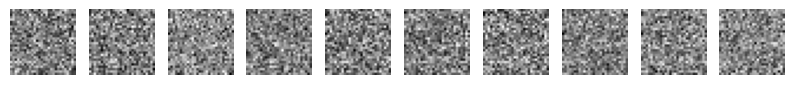

Epoch 2/50, Step 100/468
Epoch 2/50, Step 200/468
Epoch 2/50, Step 300/468
Epoch 2/50, Step 400/468


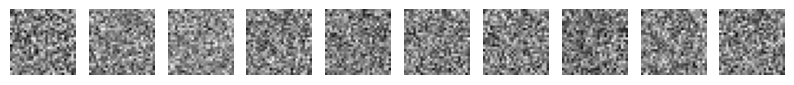

Epoch 3/50, Step 100/468
Epoch 3/50, Step 200/468
Epoch 3/50, Step 300/468
Epoch 3/50, Step 400/468


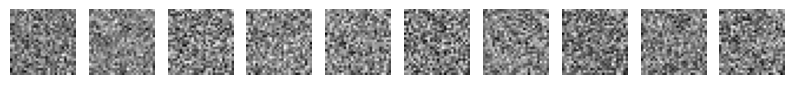

Epoch 4/50, Step 100/468
Epoch 4/50, Step 200/468
Epoch 4/50, Step 300/468
Epoch 4/50, Step 400/468


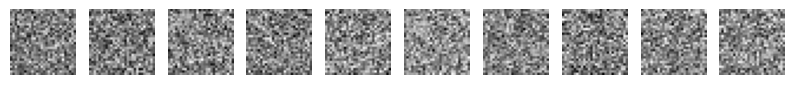

Epoch 5/50, Step 100/468
Epoch 5/50, Step 200/468
Epoch 5/50, Step 300/468
Epoch 5/50, Step 400/468


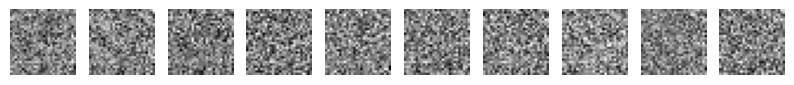

Epoch 6/50, Step 100/468
Epoch 6/50, Step 200/468
Epoch 6/50, Step 300/468
Epoch 6/50, Step 400/468


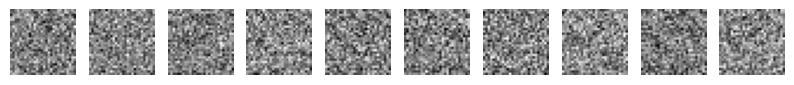

Epoch 7/50, Step 100/468
Epoch 7/50, Step 200/468
Epoch 7/50, Step 300/468
Epoch 7/50, Step 400/468


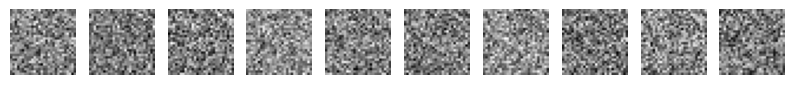

Epoch 8/50, Step 100/468
Epoch 8/50, Step 200/468
Epoch 8/50, Step 300/468
Epoch 8/50, Step 400/468


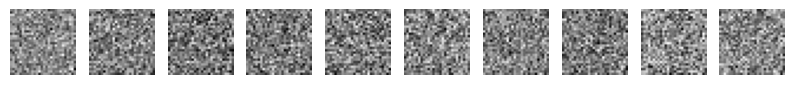

Epoch 9/50, Step 100/468
Epoch 9/50, Step 200/468
Epoch 9/50, Step 300/468
Epoch 9/50, Step 400/468


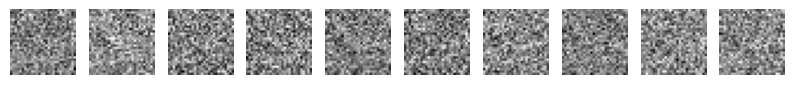

Epoch 10/50, Step 100/468
Epoch 10/50, Step 200/468
Epoch 10/50, Step 300/468
Epoch 10/50, Step 400/468


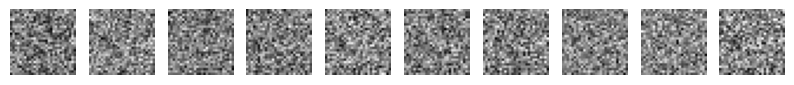

Epoch 11/50, Step 100/468
Epoch 11/50, Step 200/468
Epoch 11/50, Step 300/468
Epoch 11/50, Step 400/468


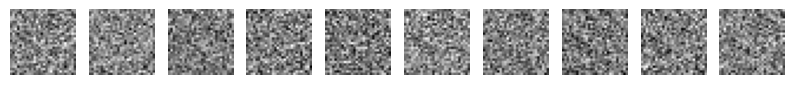

Epoch 12/50, Step 100/468
Epoch 12/50, Step 200/468
Epoch 12/50, Step 300/468
Epoch 12/50, Step 400/468


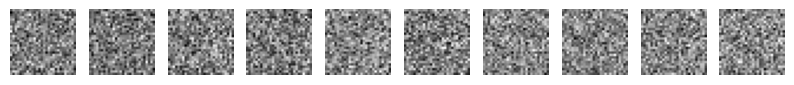

Epoch 13/50, Step 100/468
Epoch 13/50, Step 200/468
Epoch 13/50, Step 300/468
Epoch 13/50, Step 400/468


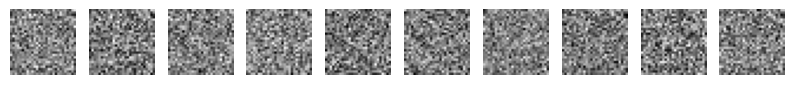

Epoch 14/50, Step 100/468
Epoch 14/50, Step 200/468
Epoch 14/50, Step 300/468
Epoch 14/50, Step 400/468


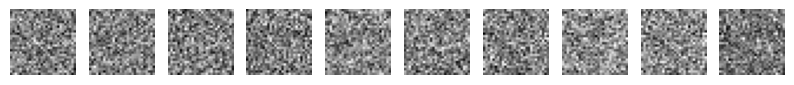

Epoch 15/50, Step 100/468
Epoch 15/50, Step 200/468
Epoch 15/50, Step 300/468
Epoch 15/50, Step 400/468


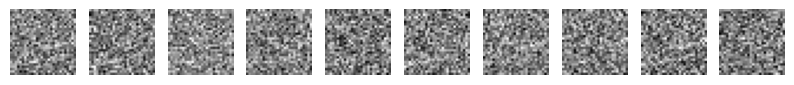

Epoch 16/50, Step 100/468
Epoch 16/50, Step 200/468
Epoch 16/50, Step 300/468
Epoch 16/50, Step 400/468


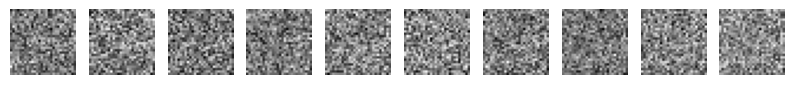

Epoch 17/50, Step 100/468
Epoch 17/50, Step 200/468
Epoch 17/50, Step 300/468
Epoch 17/50, Step 400/468


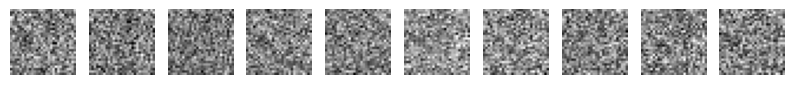

Epoch 18/50, Step 100/468
Epoch 18/50, Step 200/468
Epoch 18/50, Step 300/468
Epoch 18/50, Step 400/468


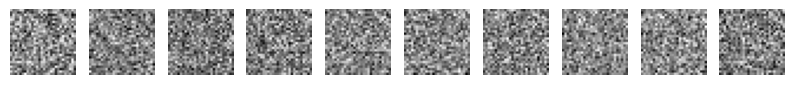

Epoch 19/50, Step 100/468
Epoch 19/50, Step 200/468
Epoch 19/50, Step 300/468
Epoch 19/50, Step 400/468


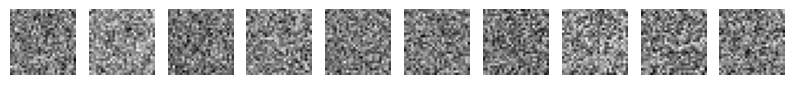

Epoch 20/50, Step 100/468
Epoch 20/50, Step 200/468
Epoch 20/50, Step 300/468
Epoch 20/50, Step 400/468


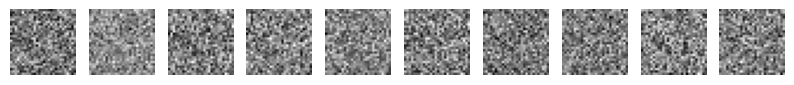

Epoch 21/50, Step 100/468
Epoch 21/50, Step 200/468
Epoch 21/50, Step 300/468
Epoch 21/50, Step 400/468


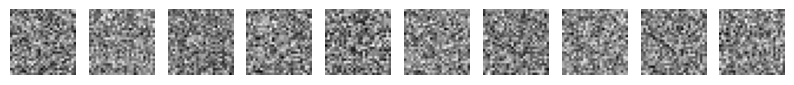

Epoch 22/50, Step 100/468
Epoch 22/50, Step 200/468
Epoch 22/50, Step 300/468
Epoch 22/50, Step 400/468


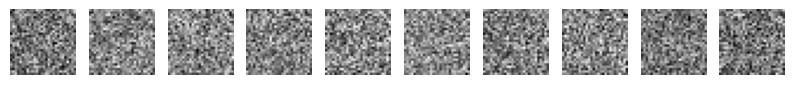

Epoch 23/50, Step 100/468
Epoch 23/50, Step 200/468
Epoch 23/50, Step 300/468
Epoch 23/50, Step 400/468


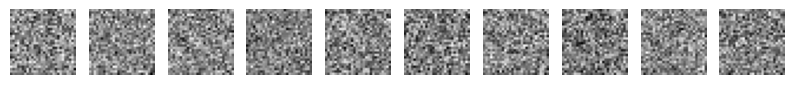

Epoch 24/50, Step 100/468
Epoch 24/50, Step 200/468
Epoch 24/50, Step 300/468
Epoch 24/50, Step 400/468


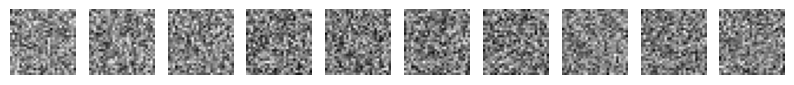

Epoch 25/50, Step 100/468
Epoch 25/50, Step 200/468
Epoch 25/50, Step 300/468
Epoch 25/50, Step 400/468


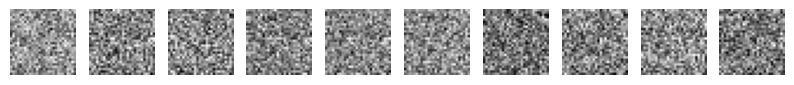

Epoch 26/50, Step 100/468
Epoch 26/50, Step 200/468
Epoch 26/50, Step 300/468
Epoch 26/50, Step 400/468


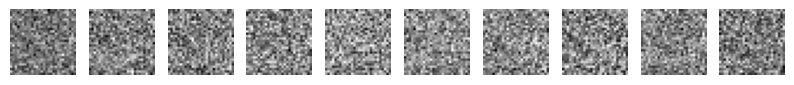

Epoch 27/50, Step 100/468
Epoch 27/50, Step 200/468
Epoch 27/50, Step 300/468
Epoch 27/50, Step 400/468


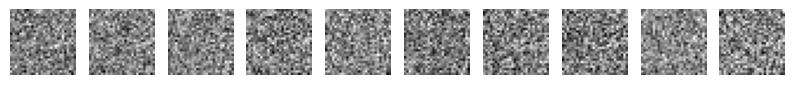

Epoch 28/50, Step 100/468
Epoch 28/50, Step 200/468
Epoch 28/50, Step 300/468
Epoch 28/50, Step 400/468


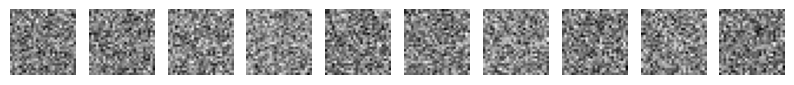

Epoch 29/50, Step 100/468
Epoch 29/50, Step 200/468
Epoch 29/50, Step 300/468
Epoch 29/50, Step 400/468


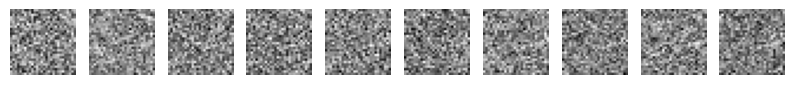

Epoch 30/50, Step 100/468
Epoch 30/50, Step 200/468
Epoch 30/50, Step 300/468
Epoch 30/50, Step 400/468


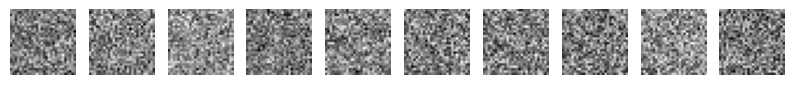

Epoch 31/50, Step 100/468
Epoch 31/50, Step 200/468
Epoch 31/50, Step 300/468
Epoch 31/50, Step 400/468


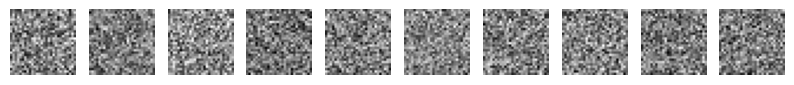

Epoch 32/50, Step 100/468
Epoch 32/50, Step 200/468
Epoch 32/50, Step 300/468
Epoch 32/50, Step 400/468


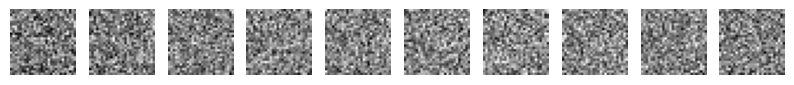

Epoch 33/50, Step 100/468
Epoch 33/50, Step 200/468
Epoch 33/50, Step 300/468
Epoch 33/50, Step 400/468


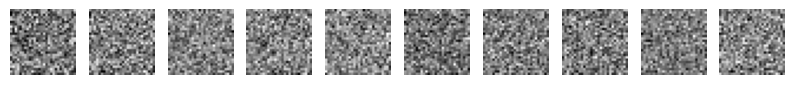

Epoch 34/50, Step 100/468
Epoch 34/50, Step 200/468
Epoch 34/50, Step 300/468
Epoch 34/50, Step 400/468


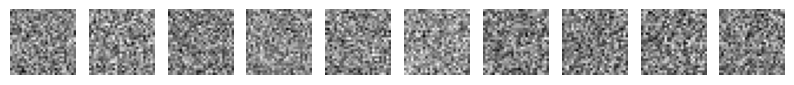

Epoch 35/50, Step 100/468
Epoch 35/50, Step 200/468
Epoch 35/50, Step 300/468
Epoch 35/50, Step 400/468


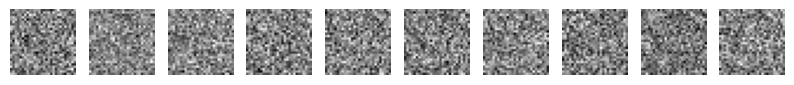

Epoch 36/50, Step 100/468
Epoch 36/50, Step 200/468
Epoch 36/50, Step 300/468
Epoch 36/50, Step 400/468


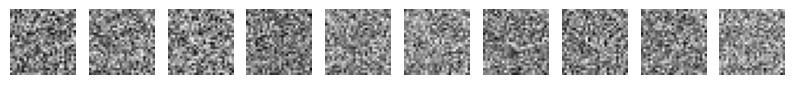

Epoch 37/50, Step 100/468
Epoch 37/50, Step 200/468
Epoch 37/50, Step 300/468
Epoch 37/50, Step 400/468


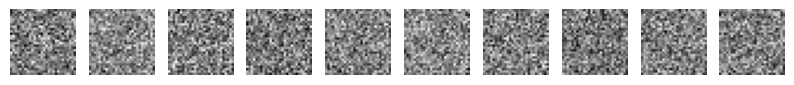

Epoch 38/50, Step 100/468
Epoch 38/50, Step 200/468
Epoch 38/50, Step 300/468
Epoch 38/50, Step 400/468


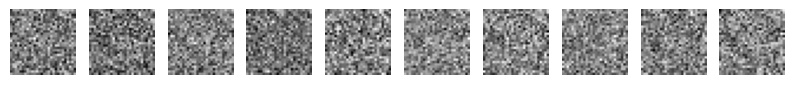

Epoch 39/50, Step 100/468
Epoch 39/50, Step 200/468
Epoch 39/50, Step 300/468
Epoch 39/50, Step 400/468


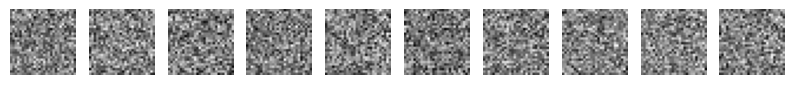

Epoch 40/50, Step 100/468
Epoch 40/50, Step 200/468
Epoch 40/50, Step 300/468
Epoch 40/50, Step 400/468


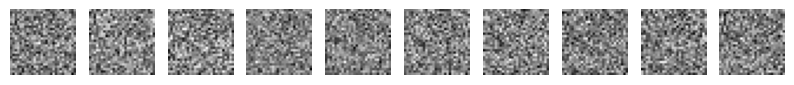

Epoch 41/50, Step 100/468
Epoch 41/50, Step 200/468
Epoch 41/50, Step 300/468
Epoch 41/50, Step 400/468


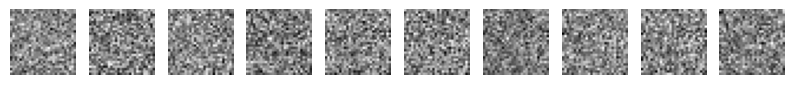

Epoch 42/50, Step 100/468
Epoch 42/50, Step 200/468
Epoch 42/50, Step 300/468
Epoch 42/50, Step 400/468


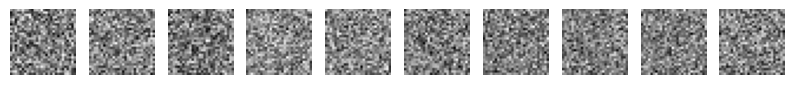

Epoch 43/50, Step 100/468
Epoch 43/50, Step 200/468
Epoch 43/50, Step 300/468
Epoch 43/50, Step 400/468


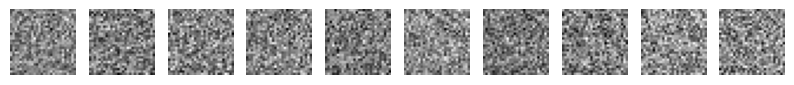

Epoch 44/50, Step 100/468
Epoch 44/50, Step 200/468
Epoch 44/50, Step 300/468
Epoch 44/50, Step 400/468


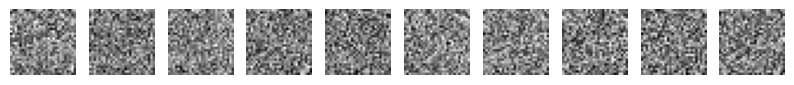

Epoch 45/50, Step 100/468
Epoch 45/50, Step 200/468
Epoch 45/50, Step 300/468
Epoch 45/50, Step 400/468


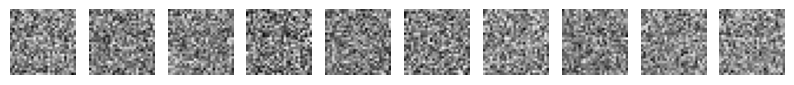

Epoch 46/50, Step 100/468
Epoch 46/50, Step 200/468
Epoch 46/50, Step 300/468
Epoch 46/50, Step 400/468


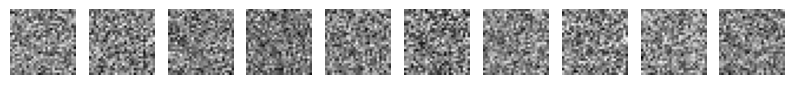

Epoch 47/50, Step 100/468
Epoch 47/50, Step 200/468
Epoch 47/50, Step 300/468
Epoch 47/50, Step 400/468


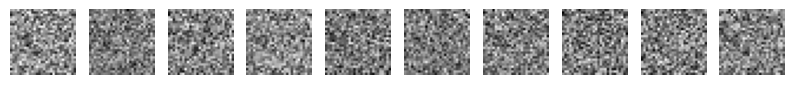

Epoch 48/50, Step 100/468
Epoch 48/50, Step 200/468
Epoch 48/50, Step 300/468
Epoch 48/50, Step 400/468


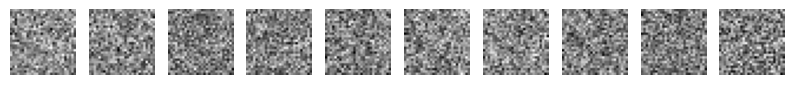

Epoch 49/50, Step 100/468
Epoch 49/50, Step 200/468
Epoch 49/50, Step 300/468
Epoch 49/50, Step 400/468


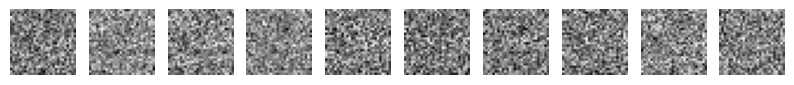

Epoch 50/50, Step 100/468
Epoch 50/50, Step 200/468
Epoch 50/50, Step 300/468
Epoch 50/50, Step 400/468


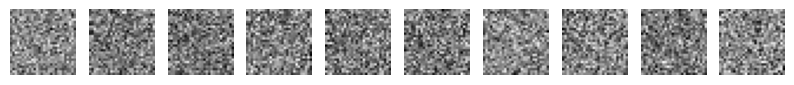

In [93]:
# Training loop
for epoch in range(epochs):
    for step, images in enumerate(dataset):
        train_step(images)

        if (step + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Step {step + 1}/{steps_per_epoch}")

    # Generate samples after each epoch
    random_latent_vectors = tf.random.normal([10, latent_dim])
    generated_images = generator(random_latent_vectors, training=False)

    # Reshape the generated images
    generated_images = generated_images.numpy().reshape(-1, 28, 28)

    # Display the generated images
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()




We can see there is not much happening, There are several reasons for it some of them are there is no sufficient depth in generator and discriminator , there are no convolutions layers which are heart while dealing with images in deep learning.